In [67]:
import matplotlib.pyplot as plt
import numpy as np

In [68]:
np.set_printoptions(precision=8)

### $\beta$-scaling (but the original estimator)

In [69]:
data = np.loadtxt("/Users/ecasiano/Xcode/pimc/pimc/Big/2D_32_1024_20_16.666667_1.000000_4.000000_1000_SWAP_42.dat")
np.shape(data)
data[:4]
data.shape[0]

477

In [70]:
P = np.sum(data,axis=0)

In [71]:
pj = np.zeros(data.shape)

In [72]:
for i in range(data.shape[1]):
    pj[:,i]=P[i]

In [73]:
N_rows = data.shape[0]
pj_bar = (pj-data)/(N_rows-1)

In [74]:
D = 2
l_max = 20
m_max = l_max**D
S = np.zeros(m_max+1)
S_err = np.zeros(m_max+1)
for m in range(m_max+1):
    S_jacknifed = -np.log(pj_bar[:,m]/pj_bar[:,0])
    S[m] = np.mean(S_jacknifed)
    S_err[m] = np.sqrt(N_rows-1)*np.std(S_jacknifed)

### Entanglement Boundary Law

In [75]:
widths = np.arange(0,l_max+1,1).astype(int)
areas = (widths*widths).astype(int)
widths,areas

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121, 144,
        169, 196, 225, 256, 289, 324, 361, 400]))

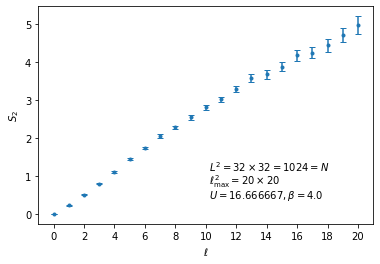

In [76]:
fig,ax1 = plt.subplots()
plt.errorbar(widths, S[areas], yerr=S_err[areas], fmt='.', capsize=3);
# plt.errorbar(widths.astype(int), S[boundary_sizes], yerr=S_err[boundary_sizes], fmt='.', capsize=3);
# ax1.plot(betas,S2s,color='lightskyblue')
ax1.set_ylabel(r'$S_2$')
ax1.set_xlabel(r'$\ell$')
# # ax1.axhline(K_exact,color='#cccccc',zorder=-10)
ax1.annotate(r"$L^2 =32 \times 32 = 1024 = N$",(0.55,0.35),xycoords='figure fraction')
ax1.annotate(r"$\ell_{\rm{max}}^2=20 \times 20$",(0.55,0.30),xycoords='figure fraction')
ax1.annotate(r"$U=16.666667,\beta=4.0$",(0.55,0.25),xycoords='figure fraction')
# # ax1.annotate(r'$K_{exact}=%.4f$'%(K_exact),(0.40,0.75),xycoords='figure fraction')
# ax1.annotate(r'$\langle K \rangle = %.4f \pm %.4f$'%(K_pimc,error),(0.40,0.70),xycoords='figure fraction')
# ax1.tick_params(axis='both',direction='in')
ax1.set_xticks(widths[::2])
plt.savefig("boundary_law_scaling.pdf")

In [77]:
for m,w in enumerate(widths_indices):
    print(f"S(m={m:02d}) = {S[w]:0.6f} +/- {S_err[w]:0.6f}")

NameError: name 'widths_indices' is not defined